In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

In [119]:
url = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.brand%255B%255D%3DNokia"
page = requests.get(url)
soup = BeautifulSoup(page.text)

p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
prices = []
for i in p:
    prices.append(i.text)
    
data = soup.find_all("div",class_="_4rR01T")

brands = []
for i in data:
    brands.append(i.text.split()[0])
    
models = []
for i in data:
    models.append(i.text.split("(")[0])
    
colors = []
for i in data:
    if "(" in i.text:
        colors.append(i.text.split("(")[1].split(",")[0])
    else:
        colors.append(np.nan)
    
features = soup.find_all("li",class_="rgWa7D")

RAM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sRAM",a)
    if len(b)>0:
        RAM.append(b[0])
        
ROM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sROM",a)
    if len(b)>0:
        ROM.append(b[0])
        
ss = []
for i in features:
    a = i.text
    b = re.findall("(\d+\.\d+)\sinch",a)
    if len(b)>0:
        ss.append(b[0])
        
battery = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\smAh",a)
    if len(b)>0:
        battery.append(b[0])

In [19]:
d = {"Brands":brands,
"Models":models,
"Color":colors,
"RAM":RAM,
"ROM":ROM,
"Battery":battery,
"SS":ss,
"Prices":prices}
df = pd.DataFrame(d)

In [12]:
len(colors)

24

In [14]:
brands

['realme',
 'Motorola',
 'Motorola',
 'Motorola',
 'POCO',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'Motorola',
 'Apple',
 'Motorola',
 'Motorola',
 'Motorola',
 'realme',
 'realme',
 'realme',
 'Motorola',
 'vivo']

In [15]:
import numpy as np
#RAM.insert(15,np.nan)

In [16]:
#battery.insert(15,np.nan)

In [17]:
len(RAM)

24

In [18]:
len(battery)

24

In [20]:
df

,Brands,Models,Color,RAM,ROM,Battery,SS,Prices
0,realme,realme C67 5G,Sunny Oasis,4,128,5000,6.72,"₹12,999"
1,Motorola,Motorola G34 5G,Ocean Green,4,128,5000,6.5,"₹10,999"
2,Motorola,Motorola G34 5G,Ocean Green,8,128,5000,6.5,"₹11,999"
3,Motorola,Motorola G34 5G,Ice Blue,8,128,5000,6.5,"₹11,999"
4,POCO,POCO C51,Royal Blue,4,64,5000,6.52,"₹5,499"
5,vivo,vivo T2x 5G,Glimmer Black,6,128,5000,6.58,"₹12,999"
6,vivo,vivo T2x 5G,Aurora Gold,6,128,5000,6.58,"₹12,999"
7,vivo,vivo T2x 5G,Marine Blue,6,128,5000,6.58,"₹12,999"
8,vivo,vivo T2x 5G,Aurora Gold,8,128,5000,6.58,"₹14,999"
9,vivo,vivo T2x 5G,Marine Blue,8,128,5000,6.58,"₹14,999"


In [ ]:
url = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2"
page = requests.get(url)
soup = BeautifulSoup(page.text)

p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
prices = []
for i in p:
    prices.append(i.text)
    
data = soup.find_all("div",class_="_4rR01T")

brands = []
for i in data:
    brands.append(i.text.split()[0])
    
models = []
for i in data:
    models.append(i.text.split("(")[0])
    
colors = []
for i in data:
    colors.append(i.text.split("(")[1].split(",")[0])
    
features = soup.find_all("li",class_="rgWa7D")

RAM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sRAM",a)
    if len(b)>0:
        RAM.append(b[0])
        
ROM = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\s\w+\sROM",a)
    if len(b)>0:
        ROM.append(b[0])
        
ss = []
for i in features:
    a = i.text
    b = re.findall("(\d+\.\d+)\sinch",a)
    if len(b)>0:
        ss.append(b[0])
        
battery = []
for i in features:
    a = i.text
    b = re.findall("(\d+)\smAh",a)
    if len(b)>0:
        battery.append(b[0])

In [25]:
"""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""+str(10)

'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=10'

In [21]:
urls = ["""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
FLIPKART&as-show=on&as=off&page=2""",
       """https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
       FLIPKART&as-show=on&as=off&page=30""",
       """https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
       FLIPKART&as-show=on&as=off&page=4"""]

In [22]:
for i in urls:
    print(i)
    

https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
       FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=
       FLIPKART&as-show=on&as=off&page=4


In [42]:
prices = []
brands = []
models = []
battery = []
RAM = []
ROM = []
ss = []
colors = []
for i in range(2,6):
    print("""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""+str(i))
    urls = """https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)

    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
   
    for i in p:
        prices.append(i.text)

    data = soup.find_all("div",class_="_4rR01T")

    
    for i in data:
        brands.append(i.text.split()[0])

    
    for i in data:
        models.append(i.text.split("(")[0])

    
    for i in data:
        colors.append(i.text.split("(")[1].split(",")[0])

    features = soup.find_all("li",class_="rgWa7D")

    
    for i in features:
        a = i.text
        b = re.findall("(\d+)\s\w+\sRAM",a)
        if len(b)>0:
            RAM.append(b[0])

    
    for i in features:
        a = i.text
        b = re.findall("(\d+)\s\w+\sROM",a)
        if len(b)>0:
            ROM.append(b[0])

    
    for i in features:
        a = i.text
        b = re.findall("(\d+\.\d+)\sinch",a)
        if len(b)>0:
            ss.append(b[0])

    
    for i in features:
        a = i.text
        b = re.findall("(\d+)\smAh",a)
        if len(b)>0:
            battery.append(b[0])
            
    print("RAM",len(RAM))
    print("Battery",len(battery))

https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
RAM 24
Battery 24
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
RAM 48
Battery 48
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
RAM 72
Battery 72
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
RAM 95
Battery 95


In [29]:
4*24

96

In [33]:
len(brands)

96

In [59]:
d = {"Brands":brands,
"Models":models,
"Color":colors,
"RAM":RAM,
"ROM":ROM,
"Battery":battery,
"SS":ss,
"Prices":prices}
df2 = pd.DataFrame(d)

In [55]:
len(prices)

72

In [43]:
brands

['realme',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'Motorola',
 'Motorola',
 'Motorola',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'POCO',
 'OnePlus',
 'OnePlus',
 'POCO',
 'OnePlus',
 'POCO',
 'OnePlus',
 'realme',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'Motorola',
 'Motorola',
 'Motorola',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'POCO',
 'OnePlus',
 'OnePlus',
 'POCO',
 'OnePlus',
 'POCO',
 'OnePlus',
 'realme',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'Motorola',
 'Motorola',
 'Motorola',
 'vivo',
 'vivo',
 'vivo',
 'POCO',
 'vivo',
 'POCO',
 'OnePlus',
 'OnePlus',
 'POCO',
 'OnePlus',
 'POCO',
 'OnePlus',
 'realme',
 'Motorola',
 'Motorola',
 'Motorola',
 'POCO',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'vivo',
 'Motorola',
 'Apple',
 'Motorola',
 'Motorola',
 'Motorola',
 'realme',
 'realme',
 'realme',
 'Motorola',
 'POCO']

In [44]:
brands.index('Apple')

87

In [45]:
# RAM.insert(87,np.nan)
# battery.insert(87,np.nan)

In [56]:
prices = []
for i in range(2,6):
    print("""https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""+str(i))
    urls = """https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="""+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)

    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")
   
    for i in p:
        prices.append(i.text)

https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5


In [58]:
len(prices)

96

In [60]:
df2

,Brands,Models,Color,RAM,ROM,Battery,SS,Prices
0,realme,realme C67 5G,Sunny Oasis,4,128,5000,6.72,"₹12,999"
1,vivo,vivo T2x 5G,Glimmer Black,6,128,5000,6.58,"₹10,999"
2,vivo,vivo T2x 5G,Marine Blue,6,128,5000,6.58,"₹11,999"
3,vivo,vivo T2x 5G,Aurora Gold,6,128,5000,6.58,"₹11,999"
4,vivo,vivo T2x 5G,Marine Blue,4,128,5000,6.58,"₹5,499"
...,...,...,...,...,...,...,...,...
91,realme,realme 11x 5G,Midnight Black,8,128,5000,6.72,"₹19,459"
92,realme,realme 11x 5G,Purple Dawn,6,128,5000,6.72,"₹6,299"
93,realme,realme 11x 5G,Midnight Black,6,128,5000,6.72,"₹19,439"
94,Motorola,Motorola G34 5G,Ice Blue,4,128,5000,6.5,"₹7,299"


In [61]:
df3 = pd.read_csv("result.csv")
df3.head()

,Unnamed: 0,Brands,Models,Color,RAM,ROM,Battery,SS,Prices
0,0,Motorola,Motorola G34 5G,Ice Blue,8,128,5000,6.50,"₹11,999"
1,1,POCO,POCO C51,Royal Blue,4,64,5000,6.52,"₹5,499"
2,2,Motorola,Motorola G34 5G,Ocean Green,4,128,5000,6.50,"₹10,999"
3,3,Motorola,Motorola G34 5G,Ocean Green,8,128,5000,6.50,"₹11,999"
4,4,vivo,vivo T2x 5G,Aurora Gold,6,128,5000,6.58,"₹12,999"


In [63]:
df3 = df3.drop('Unnamed: 0',axis=1)

In [68]:
final_df = pd.concat([df,df2,df3],ignore_index=True)

In [70]:
#final_df.to_csv("final.csv")

## Data Cleaning

In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Brands   144 non-null    object
 1   Models   144 non-null    object
 2   Color    144 non-null    object
 3   RAM      142 non-null    object
 4   ROM      144 non-null    object
 5   Battery  142 non-null    object
 6   SS       144 non-null    object
 7   Prices   144 non-null    object
dtypes: object(8)
memory usage: 9.1+ KB


### type casting

In [74]:
final_df.fillna("0",inplace=True)

In [76]:
final_df['RAM'] = final_df['RAM'].astype("int")
final_df['ROM'] = final_df['ROM'].astype("int")
final_df['Battery'] = final_df['Battery'].astype("int")
final_df['SS'] = final_df['SS'].astype("float")

In [77]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   144 non-null    object 
 1   Models   144 non-null    object 
 2   Color    144 non-null    object 
 3   RAM      144 non-null    int32  
 4   ROM      144 non-null    int32  
 5   Battery  144 non-null    int32  
 6   SS       144 non-null    float64
 7   Prices   144 non-null    object 
dtypes: float64(1), int32(3), object(4)
memory usage: 7.4+ KB


In [81]:
final_df['Prices'][0].replace("₹","").replace(",","")

'12999'

In [83]:
final_df['Prices'] = [i.replace("₹","").replace(",","") for i in final_df['Prices']]

In [85]:
final_df['Prices'] = final_df['Prices'].astype("int")

In [86]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Brands   144 non-null    object 
 1   Models   144 non-null    object 
 2   Color    144 non-null    object 
 3   RAM      144 non-null    int32  
 4   ROM      144 non-null    int32  
 5   Battery  144 non-null    int32  
 6   SS       144 non-null    float64
 7   Prices   144 non-null    int32  
dtypes: float64(1), int32(4), object(3)
memory usage: 6.9+ KB


## Data Analysis

#### Uni variate Analysis


In [89]:
final_df['Brands'].unique()

array(['realme', 'Motorola', 'POCO', 'vivo', 'Apple', 'OnePlus'],
      dtype=object)

In [90]:
final_df['Brands'].value_counts()

Brands
vivo        61
Motorola    32
POCO        21
realme      16
OnePlus     12
Apple        2
Name: count, dtype: int64

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Brands', ylabel='count'>

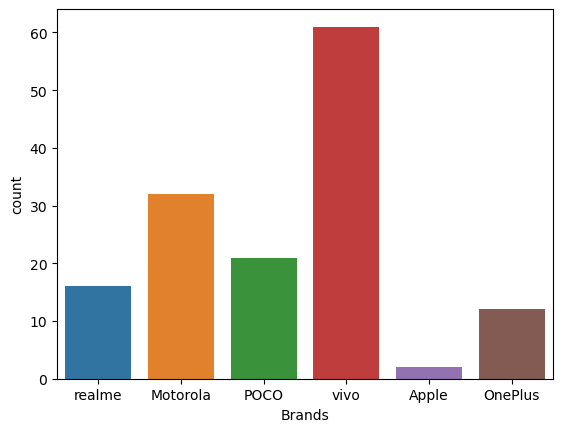

In [97]:
sns.countplot(final_df, x="Brands")

In [98]:
final_df['Prices'].describe()

count      144.000000
mean     14418.583333
std       7602.611983
min       5499.000000
25%      11999.000000
50%      12999.000000
75%      15999.000000
max      65999.000000
Name: Prices, dtype: float64

<Axes: >

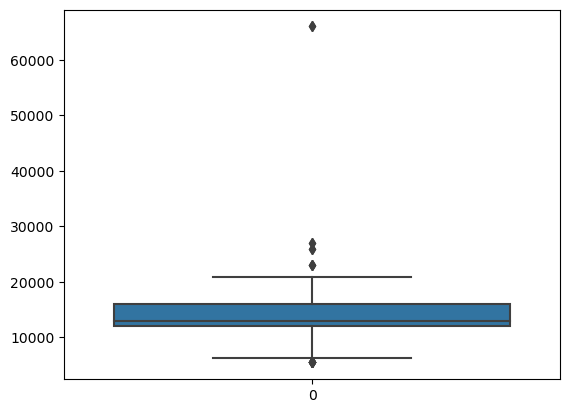

In [99]:
sns.boxplot(final_df['Prices'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3940\327978766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Prices'])


<Axes: xlabel='Prices', ylabel='Density'>

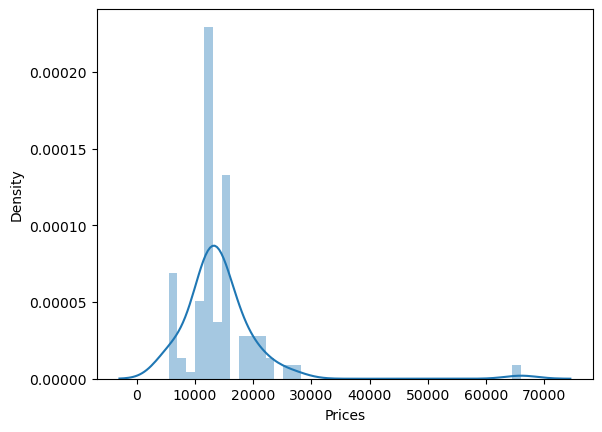

In [100]:
sns.distplot(final_df['Prices'])

<Axes: title={'center': 'Prices'}, xlabel='Brands'>

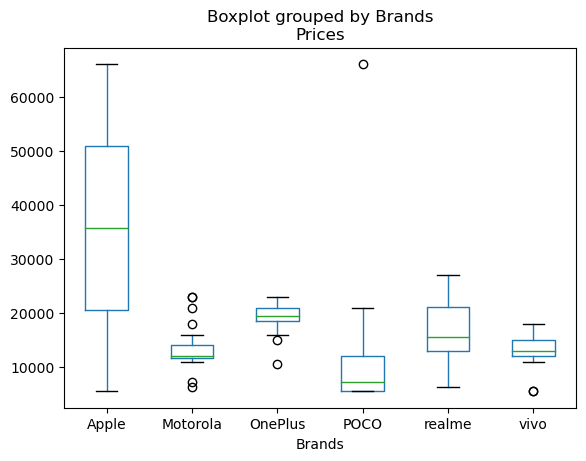

In [102]:
final_df.boxplot(by ='Brands', column =['Prices'], grid = False)

In [110]:
final_df.groupby("Brands").count()

,Models,Color,RAM,ROM,Battery,SS,Prices
Brands,,,,,,,
Apple,2,2,2,2,2,2,2
Motorola,32,32,32,32,32,32,32
OnePlus,12,12,12,12,12,12,12
POCO,21,21,21,21,21,21,21
realme,16,16,16,16,16,16,16
vivo,61,61,61,61,61,61,61


In [115]:
final_df.groupby(by=["Brands",'RAM']).max()['Prices']

Brands    RAM
Apple     0      65999
Motorola  4      14999
          8      22999
OnePlus   8      22999
POCO      4      65999
          6      20868
realme    4      12999
          6      19439
          8      26999
vivo      4      17999
          6      15999
          8      17999
Name: Prices, dtype: int32

In [116]:
final_df[(final_df['Prices']<20000)&(final_df['Prices']>17000)]

,Brands,Models,Color,RAM,ROM,Battery,SS,Prices
60,vivo,vivo T2 5G,Nitro Blaze,8,128,4500,6.38,17999
64,vivo,vivo T2 5G,Velocity Wave,8,128,4500,6.38,17999
67,OnePlus,OnePlus Nord CE 3 Lite 5G,Pastel Lime,8,128,5000,6.72,19459
69,OnePlus,OnePlus Nord CE 3 Lite 5G,Chromatic Gray,8,128,5000,6.72,19439
84,vivo,vivo T2 5G,Nitro Blaze,8,128,4500,6.38,17999
88,vivo,vivo T2 5G,Velocity Wave,8,128,4500,6.38,17999
91,OnePlus,OnePlus Nord CE 3 Lite 5G,Pastel Lime,8,128,5000,6.72,19459
93,OnePlus,OnePlus Nord CE 3 Lite 5G,Chromatic Gray,8,128,5000,6.72,19439
108,vivo,vivo T2x 5G,Glimmer Black,4,128,5000,6.58,17999
112,Motorola,Motorola g54 5G,Midnight Blue,8,128,6000,6.50,17999


### Conclusion